In [57]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reset -f

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import caffe
caffe.set_mode_gpu()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import python.helpers as helpers

In [59]:
trainingLogFile = "logs/train_mnist1.log"
modelPrototxt = "models/mnist1_train_test.prototxt"
solverPrototxt = "models/mnist1_solver.prototxt"
trainedModel = "snapshots/mnist1_iter_10000.caffemodel"

In [60]:
#Train the net
os.system("bash run_training_pipeline.sh mnist --arch1 --train --gray")

0

In [63]:
net = caffe.Net(modelPrototxt, trainedModel, caffe.TEST)

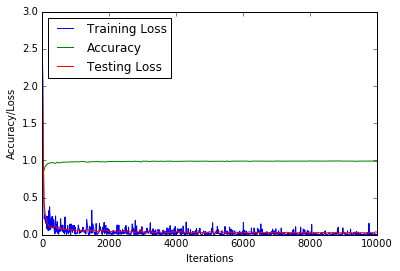

Baseline loss 2.4618
Baseline accuracy 0.1163


In [69]:
#Show training graph
iterations, losses = helpers.getTrainingLossFromTrainingFile(trainingLogFile)
plt.plot(iterations, losses, label="Training Loss")

iterations, accuracy = helpers.getAccuracyFromTrainingFile(trainingLogFile)
plt.plot(iterations, accuracy, label="Accuracy")

iterations, losses = helpers.getTestingLossFromTrainingFile(trainingLogFile)
plt.plot(iterations, losses, label="Testing Loss")

plt.xlabel("Iterations")
plt.ylabel("Accuracy/Loss")

plt.legend(loc='upper left')

plt.show()

print "Baseline loss " + losses[0]
print "Baseline accuracy " + accuracy[0]

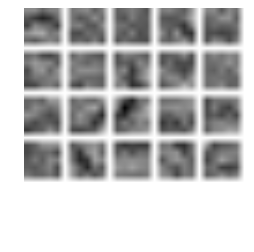

In [65]:
#Visualize learned filters from first layer
filters = net.params["conv1"][0].data
helpers.showFilterGrid(filters.transpose(0, 2, 3, 1), True)